In [1]:
# Importing requirement libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from datetime import datetime  # For calculating running time algorithm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection # random forest model creation
#load data
Olive = datasets.fetch_olivetti_faces()
print(Olive.keys())


dict_keys(['data', 'images', 'target', 'DESCR'])


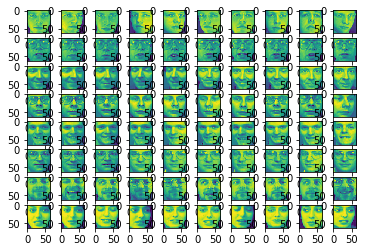

In [2]:
#split dataset to train and test data ##25% for testing

x = pd.DataFrame(Olive['data'])
y = pd.DataFrame(Olive['target'])
y = np.ravel(y)

xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)
xtrain

images = Olive.images # save images
images
# note that images can not be saved as features, as we need 2D data for
# features, whereas faces.images are 3D data i.e. (samples, pixel-x, pixel-y)
features = Olive.data  # features
targets = Olive.target # targets

fig = plt.figure() # create a new figure window
for i in range(80): # display 80 images
    # subplot : 10 rows and 10 columns
    img_grid = fig.add_subplot(8, 10, i+1)
    # plot features as image
    img_grid.imshow(images[i])

plt.show()

[1.95086132e-04 2.88443052e-04 5.70060683e-04 ... 5.70268482e-05
 0.00000000e+00 5.52875546e-04]


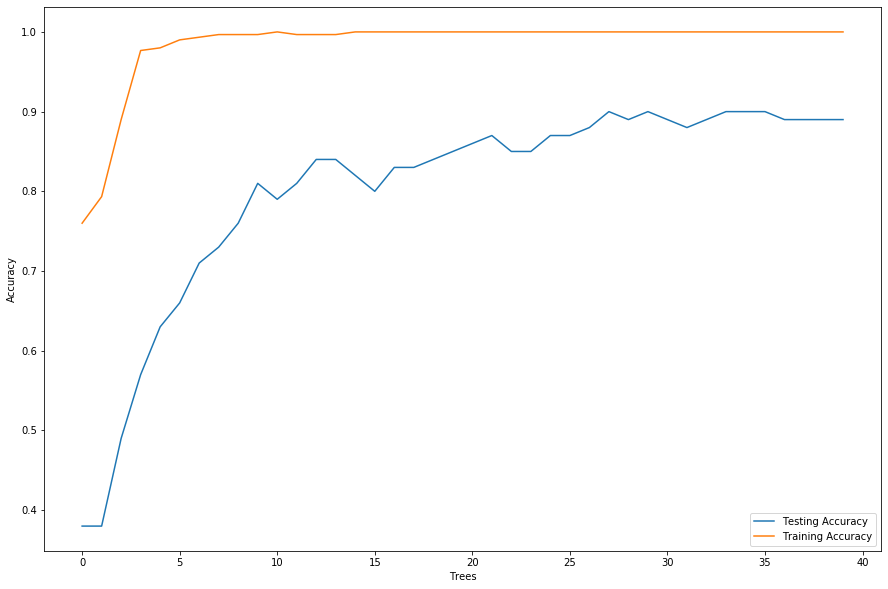

In [3]:
# Method and algorithm: Random Forest
model = ExtraTreesClassifier() 
model.fit(xtrain,ytrain) 
print(model.feature_importances_)
trees = np.arange(0,40) 
accuracy = np.zeros(40)
Rrf_accuracy = np.zeros(40)
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators= idx+1, random_state=0)
    classifier.fit(xtrain, ytrain)
    predict = classifier.predict(xtest)
    accuracy[idx] = accuracy_score(ytest, predict) 
    predR = classifier.predict(xtrain)# predict the 'target' for 'training data'
    Rrf_accuracy[idx] = accuracy_score(ytrain, predR)
    
plt.figure(figsize =(15, 10)) 
plt.plot(trees,accuracy ,label = 'Testing Accuracy')
plt.plot(trees, Rrf_accuracy, label = 'Training Accuracy')
plt.legend() 
plt.xlabel('Trees') 
plt.ylabel('Accuracy') 
plt.show()

In [4]:
start = datetime.now()
# Create the model with 13 trees (Selected according to the fracture/elbow plot)
rfc = RandomForestClassifier(n_estimators=13, 
                               bootstrap = True,
                               max_features = 'sqrt',random_state=0)
rfc.fit(xtrain,ytrain)  # predictions
rfc_predS = rfc.predict(xtest)

rf_accuracy = accuracy_score(ytest, rfc_predS)
print("test accuracy:", rf_accuracy)

predR =  rfc.predict(xtrain)# predict the 'target' for 'training data'
Rrf_accuracy = accuracy_score(ytrain, predR)
print("training accuracy:", Rrf_accuracy)

print(classification_report(ytest,rfc_predS, zero_division= 0))   # For testing dataset (You can also use it for training dataset)
print(confusion_matrix(ytest,rfc_predS))
print(rfc_predS)
def loop():
    k = 0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

test accuracy: 0.84
training accuracy: 0.9966666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.80      1.00      0.89         4
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         4
          10       1.00      1.00      1.00         3
          11       0.33      1.00      0.50         1
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       0.67      1.00      0.80         2
          17       1.00

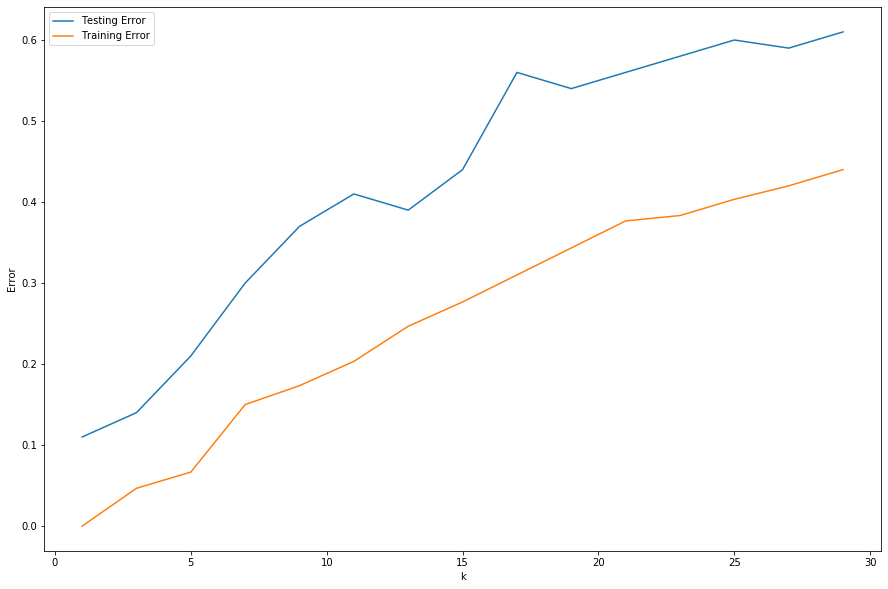

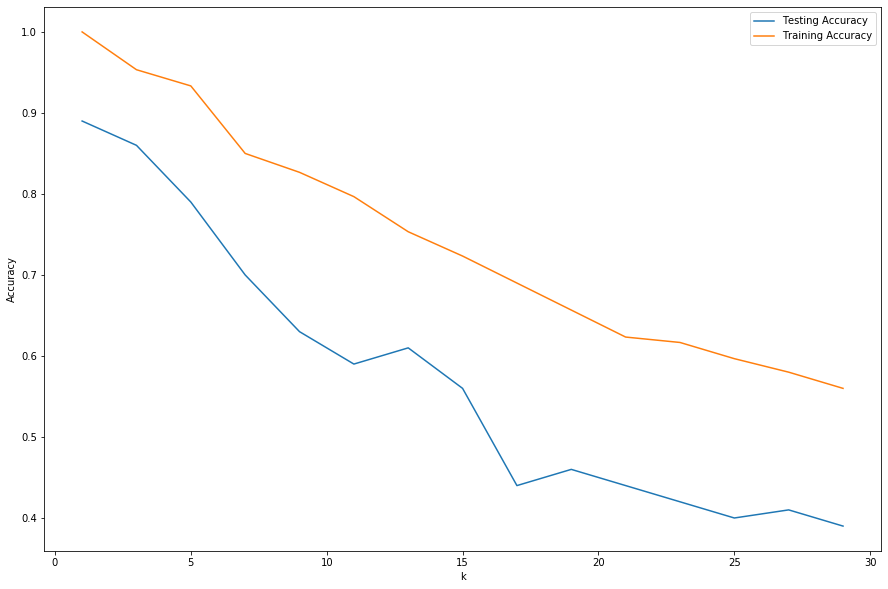

In [5]:
# Method and algorithm: KNN 
neighbors = np.arange(1, 30,2) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
test_error = np.empty(len(neighbors))
train_error = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(xtrain, ytrain) 
	
	# Compute traning and test data accuracy 
	train_accuracy[i] = knn.score(xtrain, ytrain) 
	test_accuracy[i] = knn.score(xtest, ytest)
	test_error[i] = 1 - test_accuracy[i]
	train_error[i] = 1 - train_accuracy[i]
    
# Generate plot 
plt.figure(figsize =(15, 10)) 
plt.plot(neighbors, test_error, label = 'Testing Error') 
plt.plot(neighbors, train_error, label = 'Training Error') 

plt.legend() 
plt.xlabel('k') 
plt.ylabel('Error') 
plt.show()

plt.figure(figsize =(15, 10)) 
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy') 

plt.legend() 
plt.xlabel('k') 
plt.ylabel('Accuracy') 
plt.show()

In [6]:
start = datetime.now()
knn = KNeighborsClassifier(n_neighbors=3)  # Selected according to the fracture/elbow plot
knn.fit(xtrain,ytrain)
predT = knn.predict(xtest)

# Compute traning and test data accuracy 
train_accuracy = knn.score(xtrain, ytrain) 
test_accuracy = knn.score(xtest, ytest)
print("train accuracy:",train_accuracy) #training accuracy
print("test accuracy:",test_accuracy) #testing accuracy

predN = knn.predict(xtrain) #predict for training set
print(confusion_matrix(ytest,predT)) 
print(classification_report(ytest,predT, zero_division= 0))
print(predT)
def loop():
    k = 0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

train accuracy: 0.9533333333333334
test accuracy: 0.86
[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [1 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      0.25      0.33         4
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.33      0.33      0.33         3
          13       1.00      1.00      1.00         2
          15  

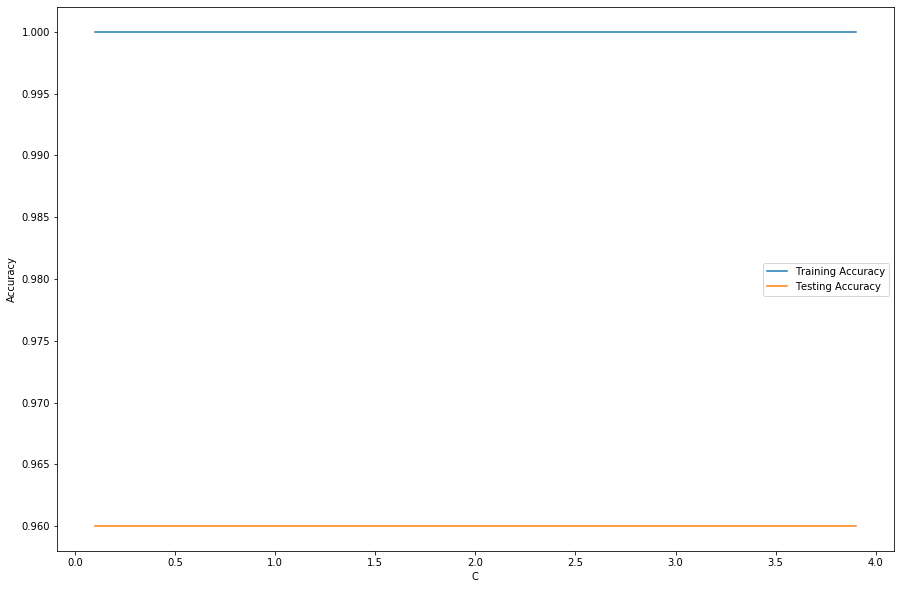

train accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
test accuracy: [0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96]


In [7]:
# Method and algorithm: Support Vector Machine with Linear kernel
c = np.arange(0.1, 4, 0.1)
svmtest_accuracy = np.zeros(39)
svmtrain_accuracy = np.zeros(39)
for idx in np.nditer(c):
    svclassifier = SVC(kernel='linear', C=idx)
    svclassifier.fit(xtrain, ytrain)
    prediction_test = svclassifier.predict(xtest)
    svmtest_accuracy[int(idx*10)-1] = accuracy_score(ytest, prediction_test)
    prediction_train = svclassifier.predict(xtrain)
    svmtrain_accuracy[int(idx*10)-1] = accuracy_score(ytrain, prediction_train)

plt.figure(figsize =(15, 10)) 
plt.plot(c, svmtrain_accuracy, label = 'Training Accuracy')
plt.plot(c, svmtest_accuracy, label = 'Testing Accuracy')
plt.legend() 
plt.xlabel('C')
plt.ylabel('Accuracy') 
plt.show()

print("train accuracy:", svmtrain_accuracy) #training accuracy
print("test accuracy:", svmtest_accuracy) #testing accuracy

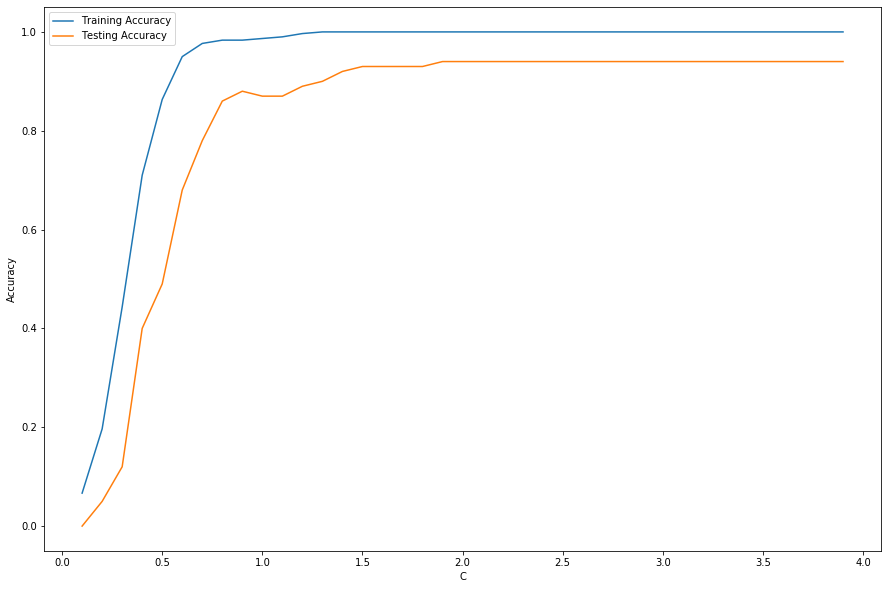

train accuracy: [0.06666667 0.19666667 0.44333333 0.71       0.86333333 0.95
 0.97666667 0.98333333 0.98333333 0.98666667 0.99       0.99666667
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
test accuracy: [0.   0.05 0.12 0.4  0.49 0.68 0.78 0.86 0.88 0.87 0.87 0.89 0.9  0.92
 0.93 0.93 0.93 0.93 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94]


In [8]:
# Method and algorithm: Support Vector Machine with rbf kernel
c = np.arange(0.1, 4, 0.1)
svmtest_accuracy = np.zeros(39)
svmtrain_accuracy = np.zeros(39)
for idx in np.nditer(c):
    svclassifier = SVC(kernel='rbf', C=idx)
    svclassifier.fit(xtrain, ytrain)
    prediction_test = svclassifier.predict(xtest)
    svmtest_accuracy[int(idx*10)-1] = accuracy_score(ytest, prediction_test)
    prediction_train = svclassifier.predict(xtrain)
    svmtrain_accuracy[int(idx*10)-1] = accuracy_score(ytrain, prediction_train)
  
plt.figure(figsize =(15, 10)) 
plt.plot(c, svmtrain_accuracy, label = 'Training Accuracy')
plt.plot(c, svmtest_accuracy, label = 'Testing Accuracy')
svmtest_accuracy
plt.legend() 
plt.xlabel('C')
plt.ylabel('Accuracy') 
plt.show()

print("train accuracy:", svmtrain_accuracy) #training accuracy
print("test accuracy:", svmtest_accuracy) #testing accuracy

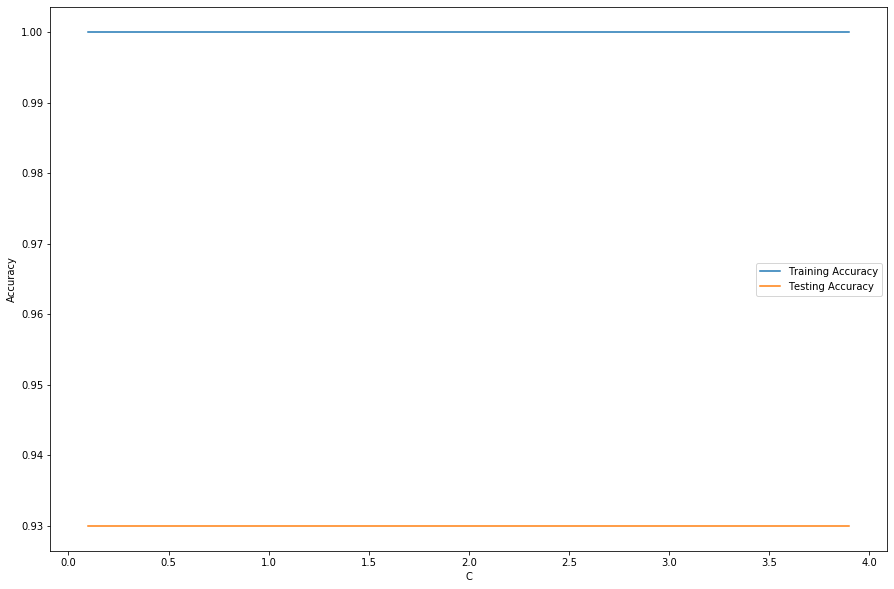

train accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
test accuracy: [0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93
 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93
 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93]


In [9]:
# Method and algorithm: Support Vector Machine with poly kernel
c = np.arange(0.1, 4, 0.1)
svmtest_accuracy = np.zeros(39)
svmtrain_accuracy = np.zeros(39)
for idx in np.nditer(c):
    svclassifier = SVC(kernel='poly', C=idx)
    svclassifier.fit(xtrain, ytrain)
    prediction_test = svclassifier.predict(xtest)
    svmtest_accuracy[int(idx*10)-1] = accuracy_score(ytest, prediction_test)
    prediction_train = svclassifier.predict(xtrain)
    svmtrain_accuracy[int(idx*10)-1] = accuracy_score(ytrain, prediction_train)

plt.figure(figsize =(15, 10))
plt.plot(c, svmtrain_accuracy, label = 'Training Accuracy')
plt.plot(c, svmtest_accuracy, label = 'Testing Accuracy')
svmtest_accuracy
plt.legend() 
plt.xlabel('C')
plt.ylabel('Accuracy') 
plt.show()

print("train accuracy:", svmtrain_accuracy) #training accuracy
print("test accuracy:", svmtest_accuracy) #testing accuracy

In [10]:
start = datetime.now()
svclassifier = SVC(kernel='linear' , C=.1)
svclassifier.fit(xtrain, ytrain)
ypred = svclassifier.predict(xtest) # predict the 'target' for 'testing data'
svm_accuracy = accuracy_score(ytest, ypred)
print("testing accuracy:", svm_accuracy)
prediction_train = svclassifier.predict(xtrain) # predict the 'target' for 'training data'
svmtrain_accuracy = accuracy_score(ytrain, prediction_train)

print("training accuracy:", svmtrain_accuracy)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred, zero_division= 0 ))
print(ypred)
def loop():
    k=0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

testing accuracy: 0.96
training accuracy: 1.0
[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         4
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         2
          15       1.00

In [11]:
# Step2: dimensionality reduction with PCA

pca = PCA(.95)  #with 95% variance 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
nxtrain,nxtest, nytrain, nytest = train_test_split(principalDf, y, test_size=0.25, random_state=1)

principalDf

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,-6.432616,-0.703668,-1.430011,1.278543,2.564390,-0.950600,2.081760,-2.937948,-0.373866,0.243108,...,0.053731,-0.020705,-0.164667,0.227840,-0.055842,-0.074256,-0.086041,-0.379614,0.276588,-0.162567
1,-1.075900,-6.697338,1.842810,5.082082,0.730562,-1.755452,-1.575966,-2.100701,-1.072437,2.061434,...,-0.212974,-0.073984,0.031485,0.046786,0.267969,-0.437362,0.249716,-0.032458,-0.272352,0.475455
2,-5.292952,-1.542500,0.225957,1.111239,2.640085,-1.674556,2.232209,-3.189368,-1.565510,0.599962,...,-0.424764,0.079382,0.003921,0.000482,-0.174545,-0.267639,0.148927,0.163953,-0.251086,-0.249367
3,-4.253564,11.327764,0.091865,-0.220420,1.407454,-0.828457,-1.170799,-0.395949,-0.189310,0.112236,...,-0.150363,-0.042526,0.188624,0.084822,0.234406,0.164780,0.068780,-0.024271,0.408600,-0.029498
4,-3.962012,-3.293859,3.652862,3.553516,2.785604,-1.815470,-1.152096,-1.140855,-1.095506,1.024149,...,0.270423,-0.334213,0.183028,0.130892,-0.052204,-0.377329,-0.542762,0.131773,-0.016461,0.518833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.200210,-0.753415,2.798512,0.972722,-1.581978,0.637091,2.040180,0.765864,-1.856771,-1.108706,...,0.145630,0.193892,0.031544,0.278683,0.081211,0.001570,-0.426068,-0.191759,0.029862,0.088744
396,-5.176731,5.825525,-0.000525,0.778200,1.590730,0.408027,-1.540084,0.802745,-0.697425,-1.734609,...,0.093594,-0.248853,-0.125939,-0.175177,0.046438,-0.104292,-0.112897,-0.171392,-0.109595,0.160680
397,2.040764,-1.509610,3.448730,1.715287,-0.910930,1.066449,0.613487,1.692924,-2.792722,-1.396811,...,0.129601,0.103699,-0.071273,0.262726,-0.111114,0.163698,-0.001305,-0.008846,-0.017812,0.014666
398,-5.165228,8.096767,-0.671011,0.658210,1.498915,-1.312592,-1.120620,1.271015,-1.089280,-1.128234,...,0.058001,-0.176406,-0.176984,-0.061993,-0.043008,0.119419,0.026244,0.036425,-0.086130,0.425914


[0.02638785 0.01390671 0.02385392 0.02255963 0.02043377 0.01865668
 0.02133197 0.02044303 0.0152766  0.00962501 0.01574804 0.01350151
 0.01510592 0.01265502 0.01831474 0.01733519 0.01247637 0.01305614
 0.01358781 0.00887285 0.01194181 0.00919432 0.01120088 0.01339408
 0.00832372 0.00935943 0.00926714 0.00886068 0.01341986 0.01213316
 0.00855646 0.00835502 0.00951944 0.00967979 0.00696582 0.00744774
 0.00820516 0.00910495 0.00681667 0.00698032 0.00691177 0.00936767
 0.00964668 0.00552965 0.00593774 0.00803924 0.00787501 0.00787251
 0.00804836 0.00774282 0.00636276 0.00750893 0.0071599  0.0065054
 0.00602027 0.00717151 0.00704028 0.00648704 0.0065685  0.00620616
 0.00527254 0.00539397 0.00568035 0.00505418 0.00594325 0.00607933
 0.0054463  0.00526579 0.00628126 0.0042686  0.0061179  0.00589753
 0.00512547 0.00686512 0.0053079  0.0050182  0.00576463 0.00504963
 0.00510492 0.00493379 0.00594515 0.00629184 0.00558053 0.00632896
 0.00509426 0.00524525 0.00550079 0.00519951 0.00481629 0.00609

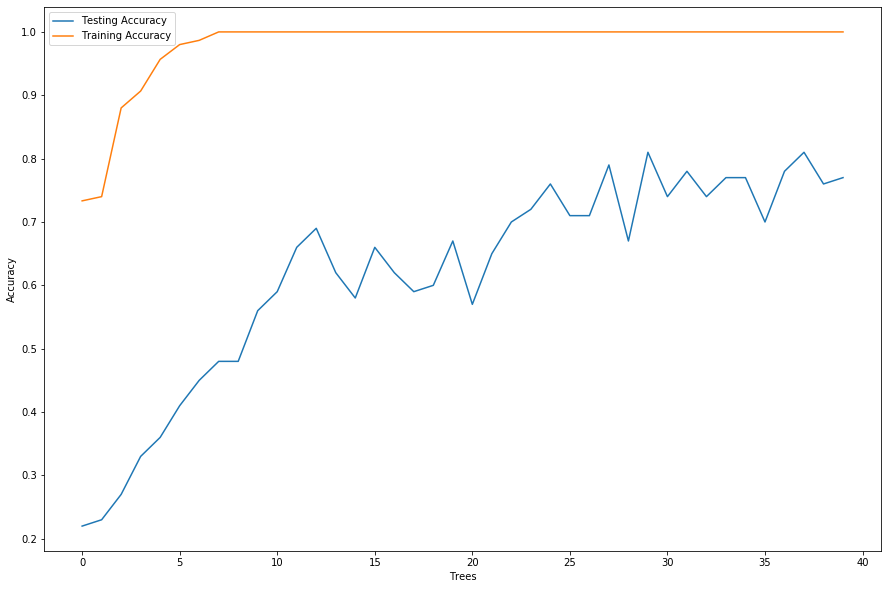

In [12]:
#Using less dimensional data

model = ExtraTreesClassifier() 
model.fit(nxtrain,nytrain) 
print(model.feature_importances_)
trees=np.arange(0,40) 
accuracy=np.zeros(40)
Rrf_accuracy=np.zeros(40)
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx+1)
    classifier.fit(nxtrain,nytrain)
    predict=classifier.predict(nxtest)
    accuracy[idx] = accuracy_score(nytest,predict) 
    predR =  classifier.predict(nxtrain)# predict the 'target' for 'training data'
    Rrf_accuracy[idx] = accuracy_score(nytrain, predR)

plt.figure(figsize =(15, 10)) 
plt.plot(trees,accuracy ,label = 'Testing Accuracy')
plt.plot(trees, Rrf_accuracy, label = 'Training Accuracy')
plt.legend() 
plt.xlabel('Trees') 
plt.ylabel('Accuracy') 
plt.show()

In [13]:
start = datetime.now()
# Create the model with 13 trees
rfc = RandomForestClassifier(n_estimators=13, 
                               bootstrap = True,
                               max_features = 'sqrt',random_state=0)
rfc.fit(nxtrain,nytrain)  # predictions
rfc_predS = rfc.predict(nxtest)

rf_accuracy = accuracy_score(nytest, rfc_predS)
print("test accuracy:", rf_accuracy)
predR = rfc.predict(nxtrain)# predict the 'target' for 'training data'
Rrf_accuracy = accuracy_score(nytrain, predR)
print("training accuracy:", Rrf_accuracy)
print(confusion_matrix(ytest,rfc_predS))
print(classification_report(ytest,rfc_predS, zero_division=0))
print(rfc_predS)
def loop():
    k = 0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

test accuracy: 0.6
training accuracy: 1.0
[[0 1 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         0
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         1
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         1
           8       0.43      1.00      0.60         3
           9       0.67      0.50      0.57         4
          10       1.00      1.00      1.00         3
          11       0.50      1.00      0.67         1
          12       0.50      0.33      0.40         3
          13       1.00      0.50      0.67         2
          14       0.00    

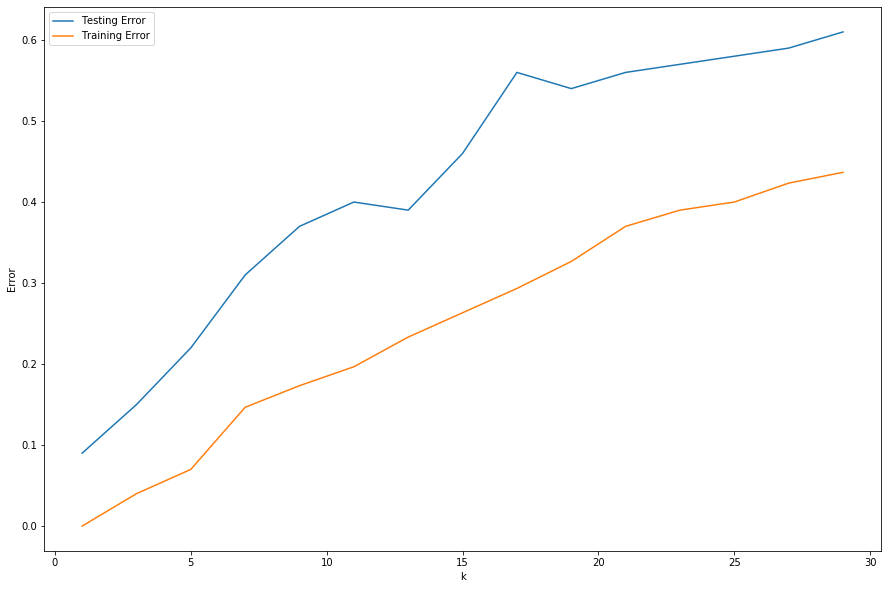

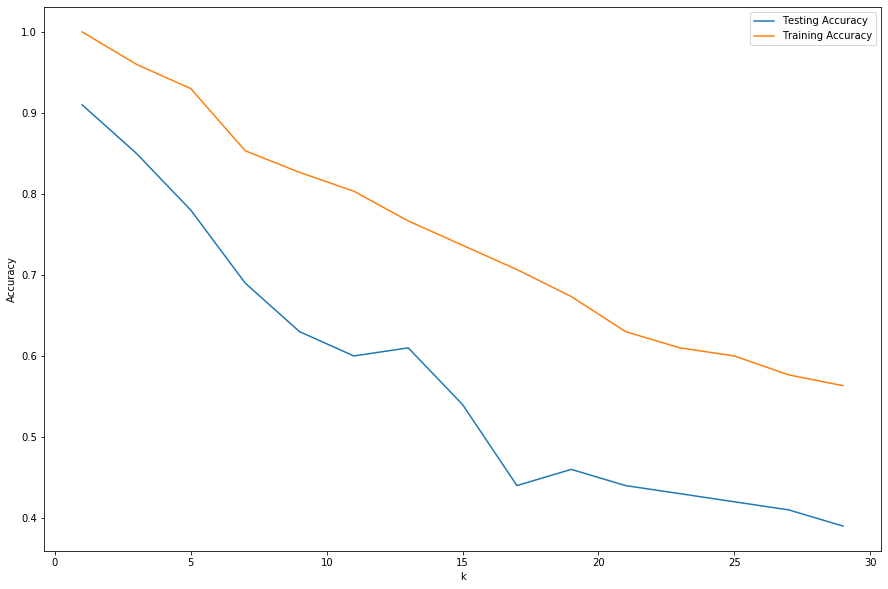

In [14]:
neighbors = np.arange(1, 30,2) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
test_error = np.empty(len(neighbors))
train_error = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(nxtrain, nytrain) 
	
	# Compute traning and test data accuracy 
	train_accuracy[i] = knn.score(nxtrain, nytrain) 
	test_accuracy[i] = knn.score(nxtest, nytest)
	test_error[i] = 1 - test_accuracy[i]
	train_error[i] = 1 - train_accuracy[i]

plt.figure(figsize =(15, 10)) 
plt.plot(neighbors, test_error, label = 'Testing Error') 
plt.plot(neighbors, train_error, label = 'Training Error') 
plt.legend() 
plt.xlabel('k') 
plt.ylabel('Error') 
plt.show()

plt.figure(figsize =(15, 10)) 
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy') 
plt.legend() 
plt.xlabel('k') 
plt.ylabel('Accuracy') 
plt.show()

In [15]:
start = datetime.now()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(nxtrain,nytrain)
predT = knn.predict(nxtest)
# Compute traning and test data accuracy 
train_accuracy = knn.score(nxtrain, nytrain) 
test_accuracy = knn.score(nxtest, nytest)

print("train accuracy:",train_accuracy)
print("test accuracy:",test_accuracy)
print(confusion_matrix(nytest,predT))
print(classification_report(nytest,predT, zero_division = 0))
print(predT)
def loop():
    k = 0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

train accuracy: 0.96
test accuracy: 0.85
[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [1 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      0.50      0.57         4
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.33      0.33      0.33         3
          13       1.00      1.00      1.00         2
          15       1.00     

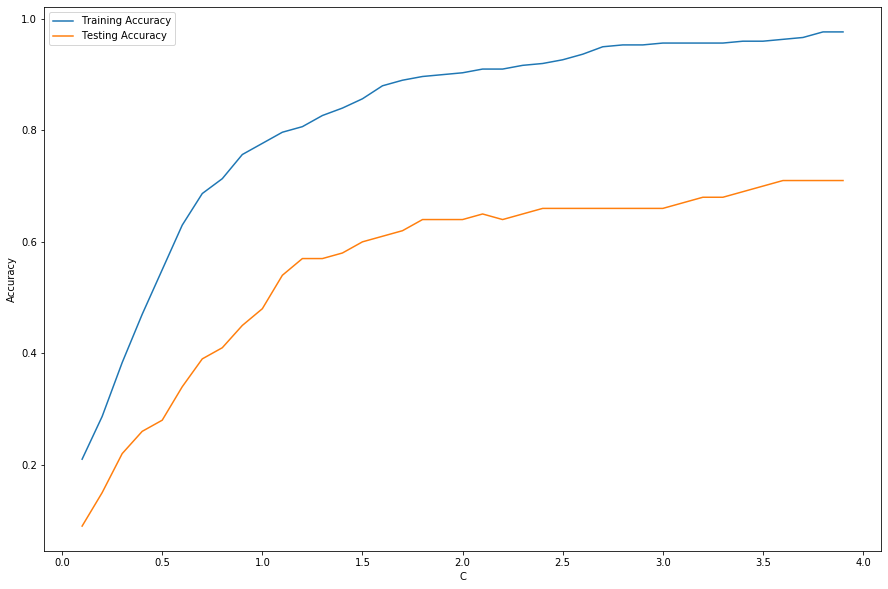

train accuracy: [0.21       0.28666667 0.38333333 0.47       0.55       0.63
 0.68666667 0.71333333 0.75666667 0.77666667 0.79666667 0.80666667
 0.82666667 0.84       0.85666667 0.88       0.89       0.89666667
 0.9        0.90333333 0.91       0.91       0.91666667 0.92
 0.92666667 0.93666667 0.95       0.95333333 0.95333333 0.95666667
 0.95666667 0.95666667 0.95666667 0.96       0.96       0.96333333
 0.96666667 0.97666667 0.97666667]
test accuracy: [0.09 0.15 0.22 0.26 0.28 0.34 0.39 0.41 0.45 0.48 0.54 0.57 0.57 0.58
 0.6  0.61 0.62 0.64 0.64 0.64 0.65 0.64 0.65 0.66 0.66 0.66 0.66 0.66
 0.66 0.66 0.67 0.68 0.68 0.69 0.7  0.71 0.71 0.71 0.71]


In [16]:
c = np.arange(0.1,4,0.1)
svmtest_accuracy = np.zeros(39)
svmtrain_accuracy = np.zeros(39)
for idx in np.nditer(c):
    svclassifier = SVC(kernel='poly', C=idx)
    svclassifier.fit(nxtrain, nytrain)
    prediction_test = svclassifier.predict(nxtest)
    svmtest_accuracy[int(idx*10)-1] = accuracy_score(nytest, prediction_test)
    prediction_train = svclassifier.predict(nxtrain)
    svmtrain_accuracy[int(idx*10)-1] = accuracy_score(ytrain, prediction_train)

plt.figure(figsize =(15, 10)) 
plt.plot(c, svmtrain_accuracy, label = 'Training Accuracy')
plt.plot(c, svmtest_accuracy, label = 'Testing Accuracy')
plt.legend() 
plt.xlabel('C')
plt.ylabel('Accuracy') 
plt.show()

print("train accuracy:", svmtrain_accuracy)
print("test accuracy:", svmtest_accuracy)

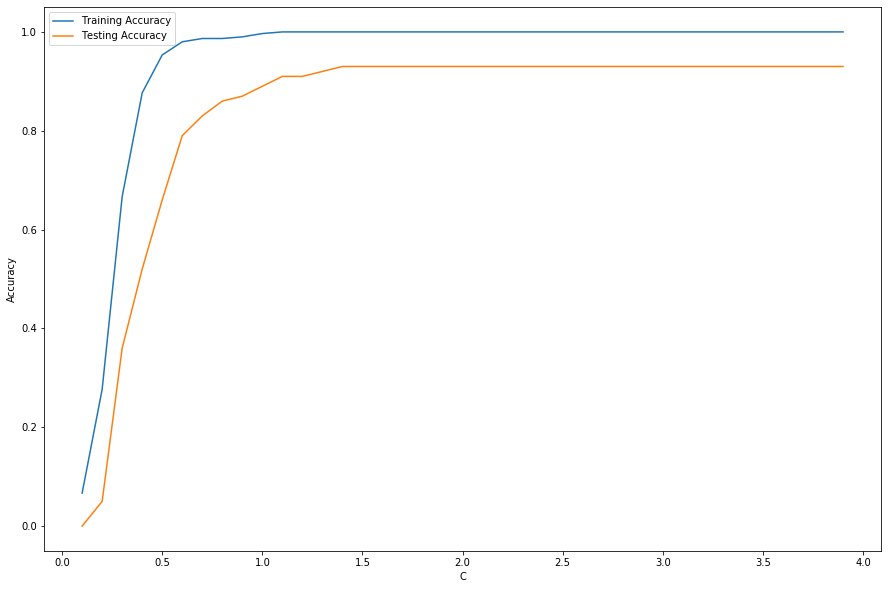

train accuracy: [0.06666667 0.27666667 0.66666667 0.87666667 0.95333333 0.98
 0.98666667 0.98666667 0.99       0.99666667 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
test accuracy: [0.   0.05 0.36 0.52 0.66 0.79 0.83 0.86 0.87 0.89 0.91 0.91 0.92 0.93
 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93
 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93]


In [17]:
c = np.arange(0.1,4,0.1)
svmtest_accuracy = np.zeros(39)
svmtrain_accuracy = np.zeros(39)
for idx in np.nditer(c):
    svclassifier = SVC(kernel='rbf', C=idx)
    svclassifier.fit(nxtrain, nytrain)
    prediction_test = svclassifier.predict(nxtest)
    svmtest_accuracy[int(idx*10)-1] = accuracy_score(nytest, prediction_test)
    prediction_train = svclassifier.predict(nxtrain)
    svmtrain_accuracy[int(idx*10)-1] = accuracy_score(ytrain, prediction_train)

plt.figure(figsize =(15, 10)) 
plt.plot(c, svmtrain_accuracy, label = 'Training Accuracy')
plt.plot(c, svmtest_accuracy, label = 'Testing Accuracy')
plt.legend() 
plt.xlabel('C')
plt.ylabel('Accuracy') 
plt.show()

print("train accuracy:", svmtrain_accuracy)
print("test accuracy:", svmtest_accuracy)

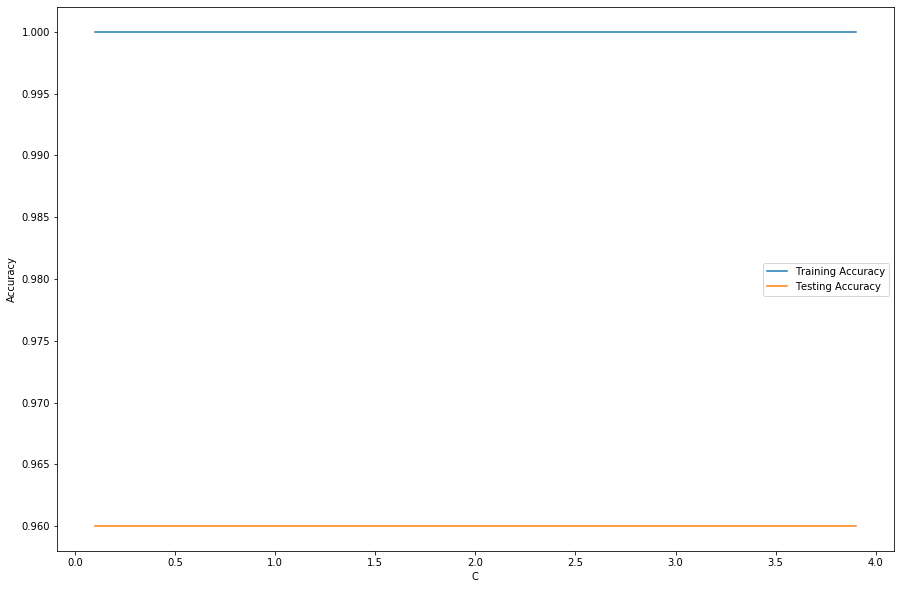

train accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
test accuracy: [0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96]


In [18]:
c = np.arange(0.1,4,0.1)
svmtest_accuracy = np.zeros(39)
svmtrain_accuracy = np.zeros(39)
for idx in np.nditer(c):
    svclassifier = SVC(kernel='linear', C=idx)
    svclassifier.fit(nxtrain, nytrain)
    prediction_test = svclassifier.predict(nxtest)
    svmtest_accuracy[int(idx*10)-1] = accuracy_score(nytest, prediction_test)
    prediction_train = svclassifier.predict(nxtrain)
    svmtrain_accuracy[int(idx*10)-1] = accuracy_score(ytrain, prediction_train)

plt.figure(figsize =(15, 10)) 
plt.plot(c, svmtrain_accuracy, label = 'Training Accuracy')
plt.plot(c, svmtest_accuracy, label = 'Testing Accuracy')
plt.legend() 
plt.xlabel('C')
plt.ylabel('Accuracy') 
plt.show()

print("train accuracy:", svmtrain_accuracy)
print("test accuracy:", svmtest_accuracy)

In [21]:
start = datetime.now()
svclassifier = SVC(kernel='linear', C=.1)
svclassifier.fit(nxtrain, nytrain)
ypred = svclassifier.predict(nxtest) # predict the 'target' for 'testing data'
svm_accuracy = accuracy_score(nytest, ypred)
print("testing accuracy:", svm_accuracy)
prediction_train = svclassifier.predict(nxtrain) # predict the 'target' for 'training data'
svmtrain_accuracy = accuracy_score(nytrain, prediction_train)

print("training accuracy:", svmtrain_accuracy)
print(confusion_matrix(nytest,ypred))
print(classification_report(nytest, ypred, zero_division=0))
print(ypred)
def loop():
    k = 0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

testing accuracy: 0.96
training accuracy: 1.0
[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         4
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         2
          15       1.00

In [22]:
start = datetime.now()
svclassifier = SVC(kernel='rbf', C=.6)
svclassifier.fit(nxtrain, nytrain)
ypred = svclassifier.predict(nxtest) # predict the 'target' for 'testing data'
svm_accuracy = accuracy_score(nytest, ypred)
print("testing accuracy:", svm_accuracy)
prediction_train = svclassifier.predict(nxtrain) # predict the 'target' for 'training data'
svmtrain_accuracy = accuracy_score(nytrain, prediction_train)
print("training accuracy:", svmtrain_accuracy)
print(confusion_matrix(nytest,ypred))
print(classification_report(nytest ,ypred, zero_division=0))
print(ypred)
def loop():
    k = 0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

testing accuracy: 0.79
training accuracy: 0.98
[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       0.80      1.00      0.89         4
           7       0.00      0.00      0.00         1
           8       0.60      1.00      0.75         3
           9       1.00      0.50      0.67         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         2
          15       0.2

In [23]:
start = datetime.now()
svclassifier = SVC(kernel='poly', C=.4)
svclassifier.fit(nxtrain, nytrain)
ypred = svclassifier.predict(nxtest) # predict the 'target' for 'testing data'
svm_accuracy = accuracy_score(nytest, ypred)
print("testing accuracy:", svm_accuracy)
prediction_train = svclassifier.predict(nxtrain) # predict the 'target' for 'training data'
svmtrain_accuracy = accuracy_score(nytrain, prediction_train)
print("training accuracy:", svmtrain_accuracy)
print(confusion_matrix(nytest ,ypred))
print(classification_report(nytest ,ypred, zero_division=0))
print(ypred)
def loop():
    k = 0
    for i in range(100):
        k+=i
    print(k)
loop()
print(datetime.now()-start)

testing accuracy: 0.26
training accuracy: 0.47
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.67      0.50      0.57         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         4
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.0

In [27]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RandomForestClassifier(n_estimators=13, 
                               bootstrap = True,
                               max_features = 'sqrt',random_state=0), x, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.95  0.925 0.9   0.9   0.925 0.9   0.875 0.875 0.775 0.875]
Accuracy of Model with Cross Validation is: 89.0


In [25]:
accuracy = cross_val_score(SVC(kernel='linear', C=.1), x, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[1.   1.   1.   1.   1.   0.95 0.95 1.   0.95 0.95]
Accuracy of Model with Cross Validation is: 97.99999999999999


In [26]:
accuracy = cross_val_score(KNeighborsClassifier(n_neighbors=3), x, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.95  0.925 0.925 0.925 0.925 0.825 0.925 0.975 0.875 0.85 ]
Accuracy of Model with Cross Validation is: 90.99999999999999
